gi


C:\Users\Di\AppData\Local\Temp\ipykernel_7344\262197067.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  ax[i].plot(x[i], y[i], 'o-r', c='k', lw=0, alpha = 0.4, mec='r', mew=0, ms=2, label = 'Усредненное значение времени')
C:\Users\Di\AppData\Local\Temp\ipykernel_7344\262197067.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  ax[i].plot(x_fit[i], y_fit[0][0], 'o-r', alpha=0.6, c='r', lw=1, mec='r', mew=0, ms=0)


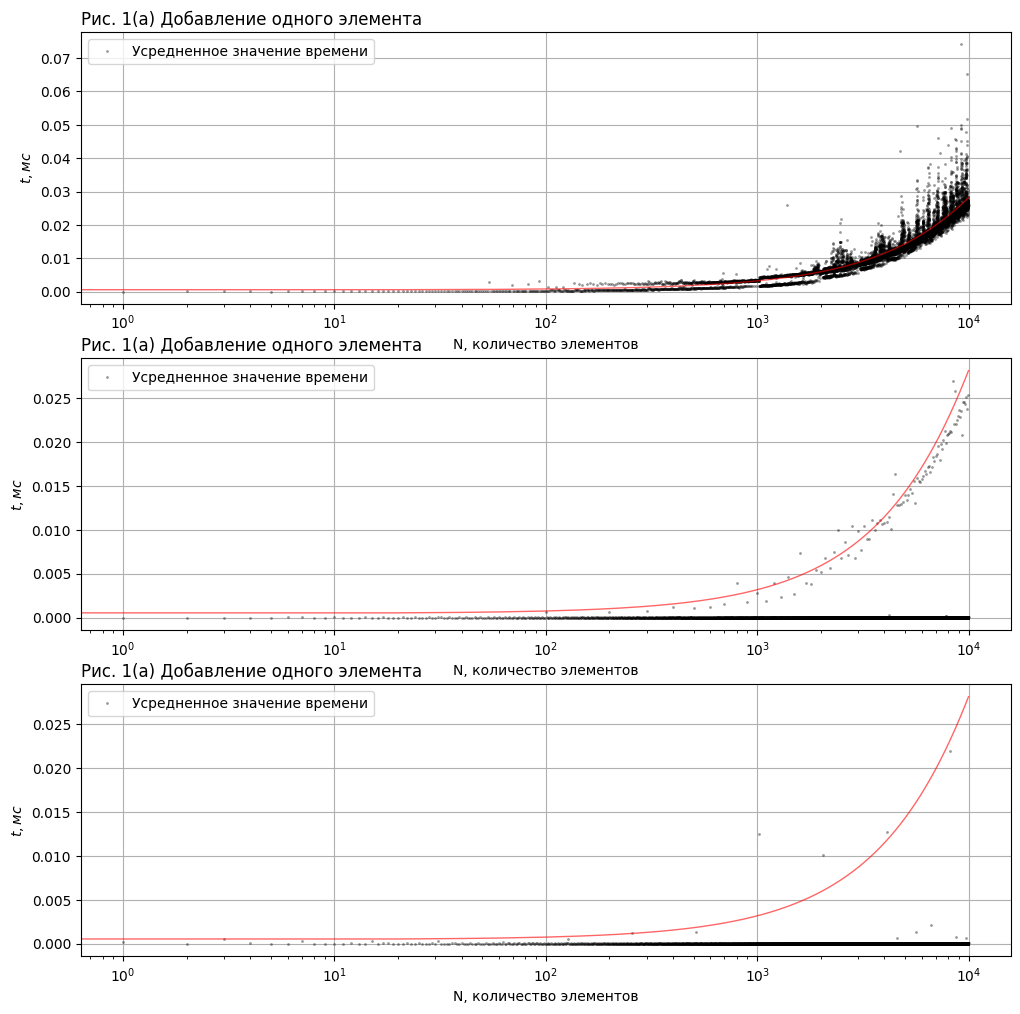

Clear files? y/n


 n


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl


print('gi')

max_, loop_times = 0, 0
with open ('C:\\Users\\Di\\Desktop\\bot\\ft\\prog\\lab2\\output\\config.txt', 'r') as file:
    file = list(map(int, file))
    max_ = int(file[0])
    loop_times = int(file[1])


files = ["firstTest.txt", "secondTest.txt", "thirdTest.txt"]

###########################################################################
# Приводим данные к нужному виду
x = [[],[],[]]
tmp = [[],[],[]]
for k in range(3):
    data = []
    with open('C:\\Users\\Di\\Desktop\\bot\\ft\\prog\\lab2\\output\\' + files[k], 'r') as file:
        for i in file:
            for j in i.split():
                #if (int(j) != 0 and int(j) != 1163005939):
                data.append(int(j))
    x[k] = [i for i in range(max_)]
    tmp[k] = data.copy()
    
    file.close()
    data.clear()
##########################################################################

a = []
y = [[],[],[]]
x_fit = []
y_fit = []
for i in range(3):
    for j in range(max_):
        y[i].append(tmp[i][j])
        y[i][j] /= 1000000

    a.append(np.polyfit(x[i], y[i], 3))
    p = np.poly1d(a[i])
    x_fit.append(np.linspace(min(x[i]), max(x[i]), 500))
    y_fit.append(p(x_fit))

##########################################################################

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax = []
ax.append(ax1)
ax.append(ax2)
ax.append(ax3)
########################
for i in range(3):
    sp = plt.subplot(310 + i + 1)
    ax[i].set_xscale('log')
    ax[i].plot(x[i], y[i], 'o-r', c='k', lw=0, alpha = 0.4, mec='r', mew=0, ms=2, label = 'Усредненное значение времени')
    ax[i].plot(x_fit[i], y_fit[0][0], 'o-r', alpha=0.6, c='r', lw=1, mec='r', mew=0, ms=0)
    plt.xlabel('N, количество элементов')
    plt.ylabel(r'$t, мс$')
    plt.title('Рис. 1(a) Добавление одного элемента', loc='left')
    plt.grid(True)
    plt.legend()

########################################################################## 

plt.show()

print('Clear files? y/n')
if (input().lower() == 'y'):
    for i in range(3):
        with open('C:\\Users\\Di\\Desktop\\bot\\ft\\prog\\lab2\\output\\' + files[i], 'w') as file:
            file = ''